In [68]:
import numpy as np 
db = np.load('norm_database5SS.npz')
cplr=db['cplrData']
mech=db['mechData']

In [69]:
#%matplotlib inline
%matplotlib notebook

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from numpy import linalg as LA


def plotPath(Pts, ax, limit, color = 'gray'):
    xline=Pts[:,0]
    yline=Pts[:,1]
    zline=Pts[:,2]
    ax.plot3D(xline, yline, zline, color)
    ax.auto_scale_xyz([-limit, limit], [-limit, limit], [-limit, limit])

def plotXYZ(center, RotMat, ax):
    C=np.vstack((center,center,center))
    R=RotMat
    r=(1,0,0)
    g=(0,1,0)
    b=(0,0,1)
    ax.quiver(C[:,0], C[:,1], C[:,2], R[:,0], R[:,1], R[:,2],color=(r,g,b,r,r,g,g,b,b))

<IPython.core.display.Javascript object>


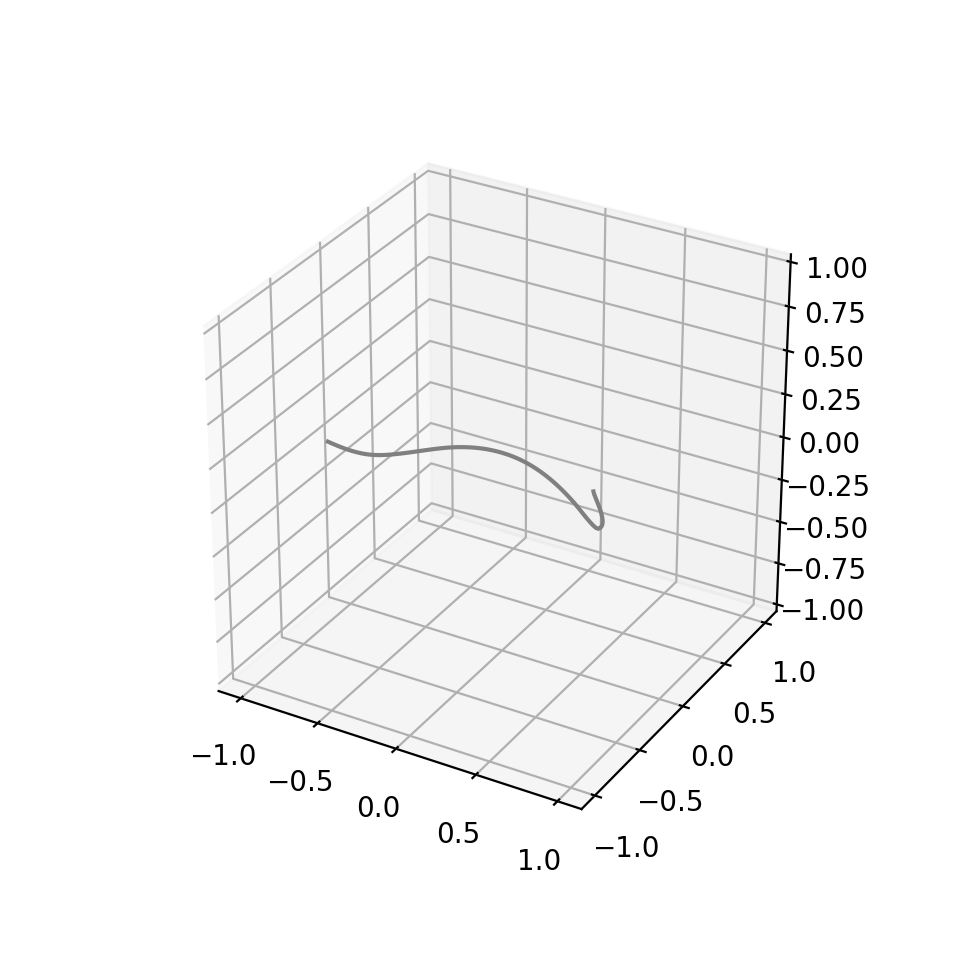

In [70]:
Pts=cplr[21]
fig = plt.figure(figsize=1*plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
plotPath(Pts, ax, 1)

# Add Mirrored mechanisms

In [90]:
def mirror(Path,Mech,Plane):
    if Plane=='xy':
        index=2
    elif Plane=='yz':
        index=1
    elif Plane=='xz':
        index=0
    
    for i in range(len(Path)):
        Path[i][:,index]=-1*Path[i][:,index]
        Mech[i][:,index]=-1*Mech[i][:,index]
    
    return Path, Mech

cplr_x,mech_x=mirror(cplr.copy(),mech.copy(),'yz')
cplr_y,mech_y=mirror(cplr.copy(),mech.copy(),'xz')
cplr_z,mech_z=mirror(cplr.copy(),mech.copy(),'xy')

<IPython.core.display.Javascript object>


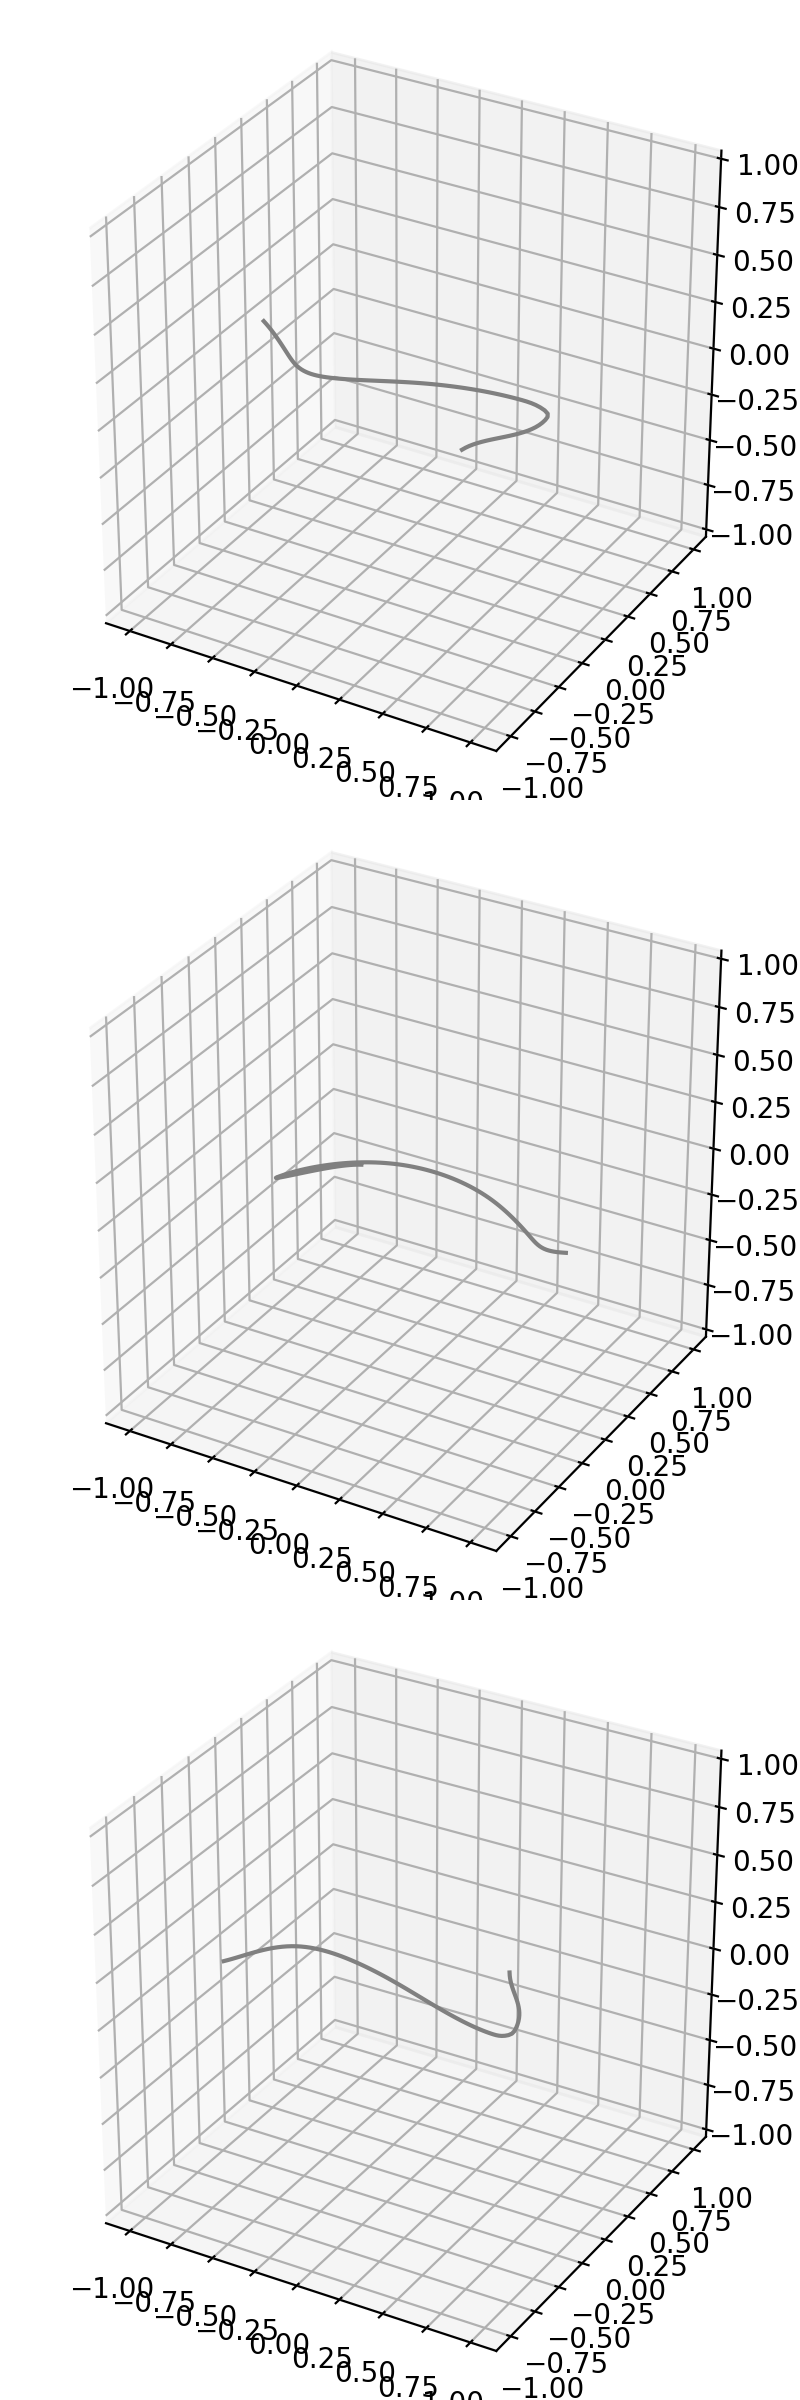

In [91]:
Pts1=cplr_x[21]
Pts2=cplr_y[21]
Pts3=cplr_z[21]
fig = plt.figure(figsize=1*plt.figaspect(3/1))
ax = fig.add_subplot(3, 1, 1, projection='3d')
plotPath(Pts1, ax, 1)
ax = fig.add_subplot(3, 1, 2, projection='3d')
plotPath(Pts2, ax, 1)
ax = fig.add_subplot(3, 1, 3, projection='3d')
plotPath(Pts3, ax, 1)
plt.tight_layout(pad=0)

# Add Partial paths from complete paths

# Add Noise for robust feature extraction